In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
combinado2018 = pd.read_csv('data/tablas/combinado2018.csv', sep=';')

In [7]:
# The dimension of data
print('Dimension data: {} rows and {} columns'.format(len(combinado2018), len(combinado2018.columns)))
# Print the first 5 rows
combinado2018.head()

Dimension data: 2893200 rows and 39 columns


,Unnamed: 0,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,...,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,DESERTOR,COD_MEN
0,25,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,ARICA,0,0,0,"4,3",76,R,R,1,NaN
1,26,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,ARICA,0,0,0,0,0,Y,T,1,NaN
2,56,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,ARICA,0,0,0,0,0,Y,T,1,NaN
3,59,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,POZO ALMONTE,0,0,0,0,0,Y,Y,1,NaN
4,61,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,ARICA,0,0,0,0,0,Y,Y,1,NaN


In [8]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 39 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   AGNO            int64  
 2   RBD             int64  
 3   DGV_RBD         int64  
 4   NOM_RBD         object 
 5   COD_REG_RBD     int64  
 6   NOM_REG_RBD_A   object 
 7   COD_PRO_RBD     int64  
 8   COD_COM_RBD     int64  
 9   NOM_COM_RBD     object 
 10  COD_DEPROV_RBD  int64  
 11  NOM_DEPROV_RBD  object 
 12  COD_DEPE        int64  
 13  COD_DEPE2       int64  
 14  RURAL_RBD       int64  
 15  ESTADO_ESTAB    int64  
 16  COD_ENSE        int64  
 17  COD_ENSE2       int64  
 18  COD_GRADO       int64  
 19  LET_CUR         object 
 20  COD_JOR         int64  
 21  COD_TIP_CUR     int64  
 22  COD_DES_CUR     int64  
 23  MRUN            int64  
 24  GEN_ALU         int64  
 25  FEC_NAC_ALU     int64  
 26  EDAD_ALU        int64  
 27  COD_REG_ALU     int64  
 28  COD_COM_ALU 

In [9]:
# PROM_GRAL change , for . the datatyope is float
combinado2018['PROM_GRAL'] = combinado2018['PROM_GRAL'].str.replace(',', '.').astype(float)

In [10]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 39 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   AGNO            int64  
 2   RBD             int64  
 3   DGV_RBD         int64  
 4   NOM_RBD         object 
 5   COD_REG_RBD     int64  
 6   NOM_REG_RBD_A   object 
 7   COD_PRO_RBD     int64  
 8   COD_COM_RBD     int64  
 9   NOM_COM_RBD     object 
 10  COD_DEPROV_RBD  int64  
 11  NOM_DEPROV_RBD  object 
 12  COD_DEPE        int64  
 13  COD_DEPE2       int64  
 14  RURAL_RBD       int64  
 15  ESTADO_ESTAB    int64  
 16  COD_ENSE        int64  
 17  COD_ENSE2       int64  
 18  COD_GRADO       int64  
 19  LET_CUR         object 
 20  COD_JOR         int64  
 21  COD_TIP_CUR     int64  
 22  COD_DES_CUR     int64  
 23  MRUN            int64  
 24  GEN_ALU         int64  
 25  FEC_NAC_ALU     int64  
 26  EDAD_ALU        int64  
 27  COD_REG_ALU     int64  
 28  COD_COM_ALU 

In [11]:
combinado2018['FEC_NAC_ALU'].unique()

array([200104, 200004, 200109, 200105, 200107, 200008, 200110, 200011,
       200208, 200108, 200202, 200207, 200206, 200102, 200009, 199809,
       199907, 200006, 200303, 199905, 200101, 200002, 200010, 199912,
       199808, 199811, 200212, 200012, 199904, 199911, 199906, 200103,
       200203, 199910, 199801, 199812, 200111, 200308, 200106, 200005,
       200007, 200001, 200403, 200311, 200310, 200306, 200302, 199909,
       200204, 199908, 200305, 200209, 201106, 201010, 200904, 200804,
       200707, 200407, 200609, 200601, 200211, 200405, 200201, 200112,
       201203, 201102, 200805, 200710, 201108, 200712, 200907, 201107,
       201101, 201001, 200809, 200901, 200312, 200410, 200909, 200902,
       200408, 201009, 201006, 200808, 200704, 200404, 200603, 200506,
       201112, 201205, 201201, 201202, 201105, 201109, 201003, 201007,
       200910, 200905, 200812, 200702, 200612, 200605, 200504, 200411,
       200412, 200409, 200503, 201111, 201012, 200604, 200608, 201110,
      

In [12]:
# Convertir 'FEC_NAC_ALU' a una cadena
combinado2018['FEC_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].astype(str)

# Asegurarse de que la cadena tiene el formato correcto (YYYYMM)
combinado2018['FEC_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].str.pad(width=6, side='left', fillchar='0')

# Convertir la cadena a un formato de fecha
combinado2018['FEC_NAC_ALU'] = pd.to_datetime(combinado2018['FEC_NAC_ALU'], format='%Y%m')

print(combinado2018['FEC_NAC_ALU'])

0         2001-04-01
1         2000-04-01
2         2001-09-01
3         2001-05-01
4         2001-07-01
             ...    
2893195   2002-07-01
2893196   2003-03-01
2893197   2001-11-01
2893198   2002-08-01
2893199   2003-06-01
Name: FEC_NAC_ALU, Length: 2893200, dtype: datetime64[ns]


In [17]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 39 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unnamed: 0      int64         
 1   AGNO            int64         
 2   RBD             int64         
 3   DGV_RBD         int64         
 4   NOM_RBD         object        
 5   COD_REG_RBD     int64         
 6   NOM_REG_RBD_A   object        
 7   COD_PRO_RBD     int64         
 8   COD_COM_RBD     int64         
 9   NOM_COM_RBD     object        
 10  COD_DEPROV_RBD  int64         
 11  NOM_DEPROV_RBD  object        
 12  COD_DEPE        int64         
 13  COD_DEPE2       int64         
 14  RURAL_RBD       int64         
 15  ESTADO_ESTAB    int64         
 16  COD_ENSE        int64         
 17  COD_ENSE2       int64         
 18  COD_GRADO       int64         
 19  LET_CUR         object        
 20  COD_JOR         int64         
 21  COD_TIP_CUR     int64         
 22  COD_DES_CUR     in

In [18]:
# Drop Unnamed: 0      
combinado2018 = combinado2018.drop(['Unnamed: 0'], axis=1)

In [19]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 38 columns):
 #   Column          Dtype         
---  ------          -----         
 0   AGNO            int64         
 1   RBD             int64         
 2   DGV_RBD         int64         
 3   NOM_RBD         object        
 4   COD_REG_RBD     int64         
 5   NOM_REG_RBD_A   object        
 6   COD_PRO_RBD     int64         
 7   COD_COM_RBD     int64         
 8   NOM_COM_RBD     object        
 9   COD_DEPROV_RBD  int64         
 10  NOM_DEPROV_RBD  object        
 11  COD_DEPE        int64         
 12  COD_DEPE2       int64         
 13  RURAL_RBD       int64         
 14  ESTADO_ESTAB    int64         
 15  COD_ENSE        int64         
 16  COD_ENSE2       int64         
 17  COD_GRADO       int64         
 18  LET_CUR         object        
 19  COD_JOR         int64         
 20  COD_TIP_CUR     int64         
 21  COD_DES_CUR     int64         
 22  MRUN            in

In [44]:
# combinado2018 nulos
combinado2018.isnull().sum()

AGNO                  0
RBD                   0
DGV_RBD               0
NOM_RBD               0
COD_REG_RBD           0
NOM_REG_RBD_A         0
COD_PRO_RBD           0
COD_COM_RBD           0
NOM_COM_RBD           0
COD_DEPROV_RBD        0
NOM_DEPROV_RBD        0
COD_DEPE              0
COD_DEPE2             0
RURAL_RBD             0
ESTADO_ESTAB          0
COD_ENSE              0
COD_ENSE2             0
COD_GRADO             0
LET_CUR               0
COD_JOR               0
COD_TIP_CUR           0
COD_DES_CUR           0
MRUN                  0
GEN_ALU               0
FEC_NAC_ALU           0
EDAD_ALU              0
COD_REG_ALU           0
COD_COM_ALU           0
NOM_COM_ALU           0
COD_RAMA              0
COD_SEC               0
COD_ESPE              0
PROM_GRAL             0
ASISTENCIA            0
SIT_FIN               0
SIT_FIN_R             0
DESERTOR              0
COD_MEN           79315
dtype: int64

In [45]:
# Drop COD_MEN de combinado2018
combinado2018 = combinado2018.drop(['COD_MEN'], axis=1)

In [46]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 37 columns):
 #   Column          Dtype         
---  ------          -----         
 0   AGNO            int64         
 1   RBD             int64         
 2   DGV_RBD         int64         
 3   NOM_RBD         object        
 4   COD_REG_RBD     int64         
 5   NOM_REG_RBD_A   object        
 6   COD_PRO_RBD     int64         
 7   COD_COM_RBD     int64         
 8   NOM_COM_RBD     object        
 9   COD_DEPROV_RBD  int64         
 10  NOM_DEPROV_RBD  object        
 11  COD_DEPE        int64         
 12  COD_DEPE2       int64         
 13  RURAL_RBD       int64         
 14  ESTADO_ESTAB    int64         
 15  COD_ENSE        int64         
 16  COD_ENSE2       int64         
 17  COD_GRADO       int64         
 18  LET_CUR         object        
 19  COD_JOR         int64         
 20  COD_TIP_CUR     int64         
 21  COD_DES_CUR     int64         
 22  MRUN            in

In [47]:
# Convertir dataframe a matrix
dfMatrix = combinado2018.to_numpy()


In [48]:
dfMatrix

array([[2018, 1, 9, ..., 'R', 'R', 1],
       [2018, 1, 9, ..., 'Y', 'T', 1],
       [2018, 1, 9, ..., 'Y', 'T', 1],
       ...,
       [2019, 41421, 2, ..., 'P', 'P', 0],
       [2019, 41421, 2, ..., 'P', 'P', 0],
       [2019, 41421, 2, ..., 'P', 'P', 0]], dtype=object)

In [57]:
catColumnsPos = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36]

In [56]:
# imprimir columnas de dfMatrix con indices de cada columna
for i, val in enumerate(dfMatrix[0]):
    print(i, val)

0 2018
1 1
2 9
3 LICEO POLITECNICO ARICA
4 15
5 AYP
6 151
7 15101
8 ARICA
9 151
10 ARICA
11 2
12 1
13 0
14 1
15 510
16 7
17 1
18 A
19 1
20 0
21 0
22 3973743
23 1
24 2001-04-01 00:00:00
25 17
26 15
27 15101
28 ARICA
29 0
30 0
31 0
32 4.3
33 76
34 R
35 R
36 1


In [38]:
from sklearn.exceptions import *

In [67]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 2023, n_init = 5, max_iter=100, verbose = 2)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except ConvergenceWarning as e:
        print(f"Convergence Warning: {e}")
    except Exception as e:
        print(f"Error: {e}")
    break


Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroidsInit: initializing centroids

Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Run: 1, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Run: 2, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Run: 4, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Run: 5, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Best run was number 1
Cluster initiation: 1


In [68]:
print(len(range(1, 6)))  # Debería ser 5
print(len(cost))         # Verifica la longitud de tu lista cost

5
1


In [69]:
print(cost)

[2449688870.952694]


In [71]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': [1], 'Cost': cost})

In [65]:
print(cost)

[2449688870.952694]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


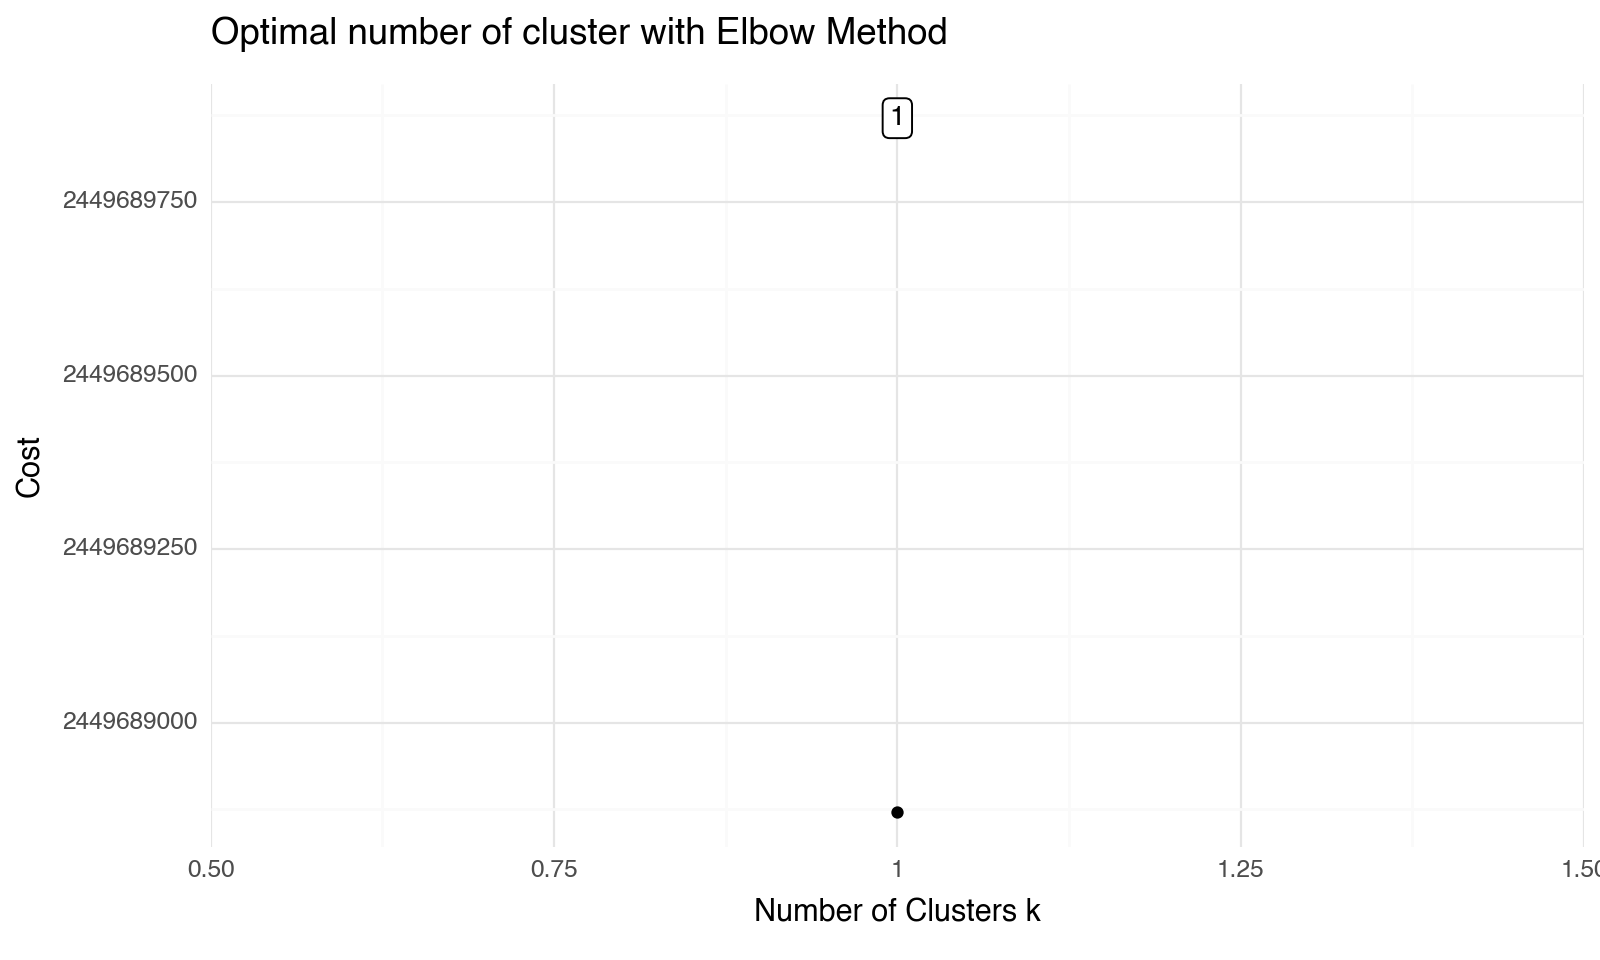

<Figure Size: (800 x 480)>

In [66]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [72]:
dfMatrix = combinado2018.to_numpy()

# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Cao', random_state = 2023, n_init = 5, max_iter=100, verbose = 2)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except ConvergenceWarning as e:
        print(f"Convergence Warning: {e}")
    except Exception as e:
        print(f"Error: {e}")
    break

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Run: 5, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Run: 3, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Run: 2, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Run: 4, iteration: 1/100, moves: 0, ncost: 2449688870.952694
Best run was number 1
Cluster initiation: 1


In [74]:
print(cost)

[2449688870.952694]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


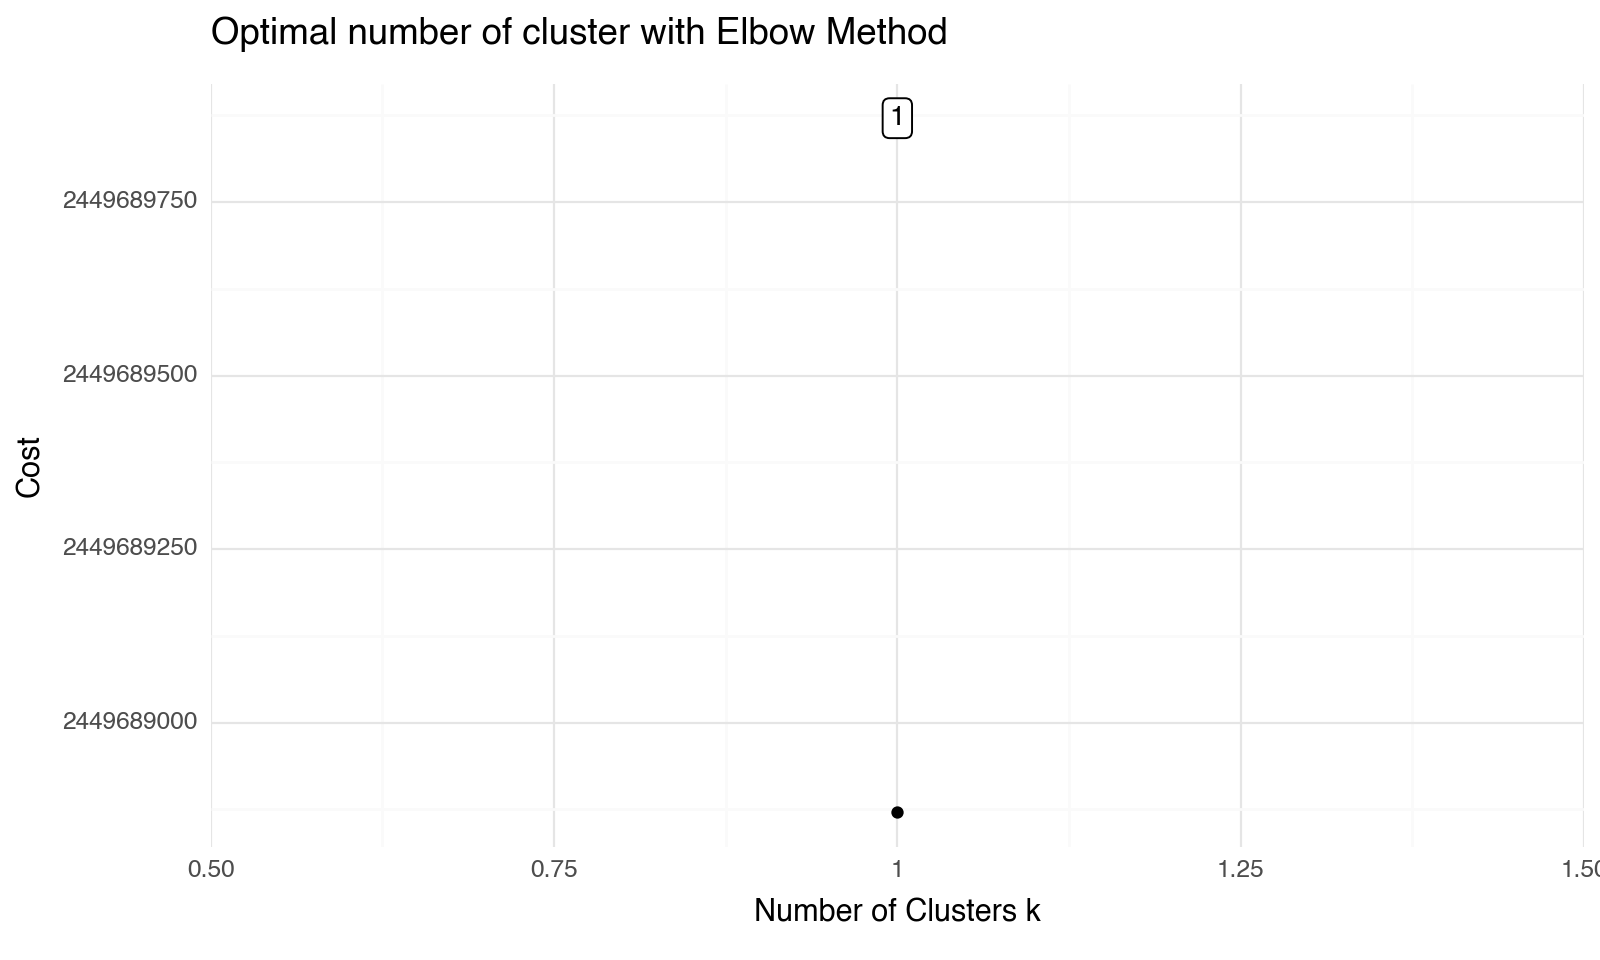

<Figure Size: (800 x 480)>

In [77]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': [1], 'Cost': cost})

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [79]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Cao', random_state = 2023)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)